In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt 
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andreharper/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Identify the Problem
## How can we use classification to sort messages as spam vs non-spam?
## What features are most vital to complete this?

## Data found on kaggle
## List string of message and informs whether it is spam or not spam

In [2]:
df = pd.read_csv('spam.csv')



df.isna().sum()



Unnamed: 0    0
spamORham     0
Message       0
dtype: int64

## We can see that the dataset contains no nulls

## When looking at the head of the dataset, we can see the message column consists of strings. 

In [3]:
df.head(10)

,Unnamed: 0,spamORham,Message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,6,ham,Even my brother is not like to speak with me. ...
7,7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,8,spam,WINNER!! As a valued network customer you have...
9,9,spam,Had your mobile 11 months or more? U R entitle...


## Preprocessing 
### Make all messages lowercase for consistency

In [4]:
df['Message'] = df['Message'].str.lower()
df.head(10)

,Unnamed: 0,spamORham,Message
0,0,ham,"go until jurong point, crazy.. available only ..."
1,1,ham,ok lar... joking wif u oni...
2,2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,3,ham,u dun say so early hor... u c already then say...
4,4,ham,"nah i don't think he goes to usf, he lives aro..."
5,5,spam,freemsg hey there darling it's been 3 week's n...
6,6,ham,even my brother is not like to speak with me. ...
7,7,ham,as per your request 'melle melle (oru minnamin...
8,8,spam,winner!! as a valued network customer you have...
9,9,spam,had your mobile 11 months or more? u r entitle...


## Data Understanding/Visualization
### Use methods to try to further understand and visualize the data. Make sure to remember your initial problems/questions when completing this step.
### While exploring, does anything else stand out to you (perhaps any surprising insights?)

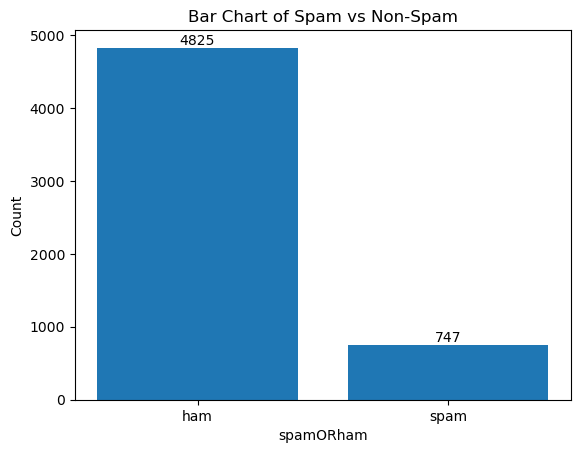

In [5]:
df['spamORham'].value_counts()

# quality df 
quality_counts = df['spamORham'].value_counts()


bars = plt.bar(quality_counts.index, quality_counts)

plt.xlabel('spamORham')
plt.ylabel('Count')
plt.title('Bar Chart of Spam vs Non-Spam')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


## We can see that the messages are mostly non-spam (86.6% non-spam vs 13.4% spam)

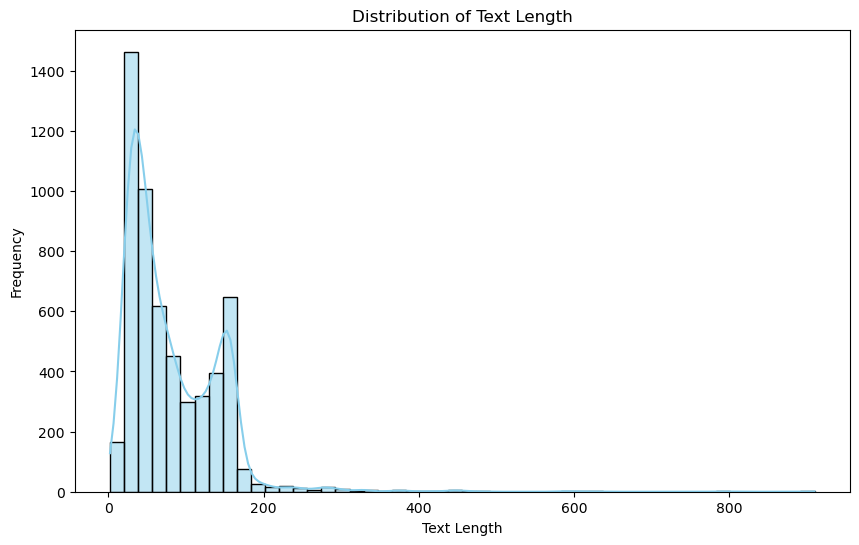

In [6]:
text_lengths = df['Message'].apply(len)

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(text_lengths, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


### 

#                             ***          Top 10 most used words ***
## This will help us understand what words may commonly be used in spam messages. It's also important to note that many of these words are also just the most common words in the english language.


In [7]:
words = [word.lower() for message in df['Message'] for word in word_tokenize(message)]
word_counts = Counter(words)
top_10_words = word_counts.most_common(10)
print('Top 10 Most Frequent Words:')
for word, frequency in top_10_words:
    print(f'{word}: {frequency}')

Top 10 Most Frequent Words:
.: 4693
i: 2900
to: 2241
you: 2228
,: 1871
?: 1541
a: 1423
!: 1381
the: 1324
...: 1131


## Modeling
### What model(s) do you use to try to solve your problem? Why do you choose those model(s)?
### Briefly explain each algorithm used (what is it, how does it work, pros/cons, etc.).

## Using naive bayes for classification model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [8]:
X = df['Message']
y = df['spamORham']
X.shape, y.shape


((5572,), (5572,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MultinomialNB()

In [15]:
accuracy = nb_classifier.score(X_test_vectorized, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9838565022421525


## Evaluation
### How well does your model(s) perform? What evaluation metrics do you use and why?

## Storytelling
### What have you learned? Tell a story around your data (insights gained through modeling).
### Were you able to answer your initial problems/questions (if so, discuss that)?

## Impact Section
### Discuss the possible impact of your project. This can be socially, ethically, etc. It cannot be something like "our project has no impact" or "our project has no negative impact." Even the most well-intentioned projects *could* have a negative impact. We will not be checking for "right" or "wrong" answers, but showing your critical thinking.

## References
## Include any references.